In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
conn = engine.connect()
prcpdata = pd.read_sql("SELECT * FROM Measurement", conn)
prcpdata

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


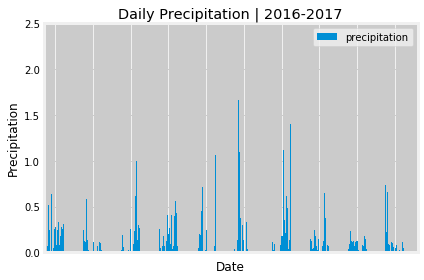

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
start_date = "2016-08-23"
end_date = "2017-08-23"
    
dateprcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > start_date).\
    filter(Measurement.date < end_date).\
    order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame and set the index to the date column
prcpdatayear = pd.DataFrame(dateprcp)
prcpdatayear.set_index('date', inplace=True)


# Sort the dataframe by date
groupprcpdate = prcpdatayear.groupby('date').mean()
groupprcp = groupprcpdate.rename(columns={"prcp":"precipitation"})
groupprcp.head(20)


# Use Pandas Plotting with Matplotlib to plot the data
prcpplot = groupprcp.plot(kind="bar")
plt.title("Daily Precipitation | 2016-2017")
plt.xlabel("Date")
plt.ylabel("Precipitation")

prcpplot.set_xticklabels([])

plt.tight_layout()
plt.savefig("Images/dailyprecipitation.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcpsummary = groupprcp['precipitation'].describe()
summary_table = pd.DataFrame(prcpsummary)
summary_table

,precipitation
count,364.000000
mean,0.170090
std,0.296122
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [13]:
stationdata = pd.read_sql("SELECT * FROM Station", conn)
stationdata

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
5,6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
6,7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
7,8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4


In [14]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Station.station).count()
print(f"There are {stations} stations in this dataset")

There are 9 stations in this dataset


In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationslist = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
stationslist


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Most Active Station
highstation = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).first()
highstation

print(f"The station with the highest number of observations is station {highstation.station}.")

The station with the highest number of observations is station USC00519281.


In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

lowtemp = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == highstation.station).all()

hightemp = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == highstation.station).all()

avgtemp = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == highstation.station).all()

print(f"Station {highstation.station}")
print(f"-------------------------------------------")
print(f"Lowest Temperature Recorded: {lowtemp}")
print(f"Highest Temperature Recorded: {hightemp}")
print(f"Average Temperature: {avgtemp}")


Station USC00519281
-------------------------------------------
Lowest Temperature Recorded: [(54.0,)]
Highest Temperature Recorded: [(85.0,)]
Average Temperature: [(71.66378066378067,)]


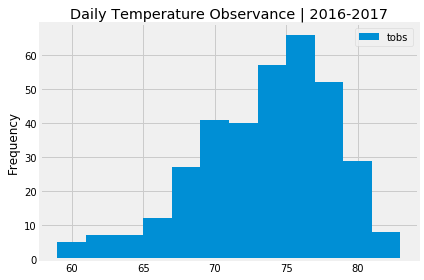

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
start_date2 = "2016-08-23"
end_date2 = "2017-08-23"

datehigh = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date > start_date).\
    filter(Measurement.date < end_date).\
    filter(Measurement.station == highstation.station).\
    order_by(Measurement.date).all()

tobsdatayear = pd.DataFrame(datehigh)

plt.figure()
tobsdatayear['tobs'].plot.hist(by='date', bins=12)
plt.title("Daily Temperature Observance | 2016-2017")
plt.legend(['tobs'])

plt.tight_layout()
plt.savefig("Images/dailytobs.png")
plt.show()

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-03-15', '2016-03-23'))

[(63.0, 70.01818181818182, 78.0)]


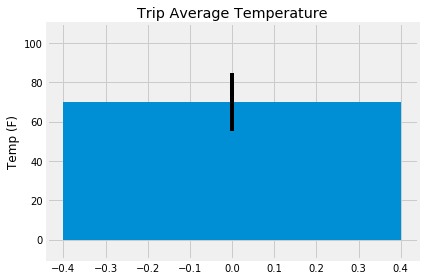

In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

triptemps = calc_temps('2016-03-15', '2016-03-23')

triptempsresult = [str(trip) for trip in triptemps]

triptempsresult = triptempsresult[0].replace("(", "").replace(")", "")
triptempsresult = triptempsresult.split(', ')

triptemppd = pd.to_numeric(triptempsresult)

tripmin = triptemppd[0]
tripavg = triptemppd[1]
tripmax = triptemppd[2]
trippeaks = tripmax - tripmin

plt.bar(0, tripavg, yerr=trippeaks)
plt.title("Trip Average Temperature")
plt.ylabel("Temp (F)")
plt.ylim(-10, 110)
plt.tight_layout()
plt.savefig("Images/tripavgtemp.png")
plt.show()

In [22]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def calc_station_prcp(start_date, end_date):
    return session.query(func.sum(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
        filter(Measurement.station == Station.station).\
        filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()


tripprcp = calc_station_prcp('2016-03-15', '2016-03-23')

tripprcpresults = [str(trip) for trip in tripprcp]

tripprcpresults

["(2.62, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)",
 "(2.02, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)",
 "(1.7100000000000002, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)",
 "(1.23, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)",
 "(1.05, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)",
 "(0.13, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)",
 "(0.0, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)"]

## Optional Challenge Assignment

In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.strftime("%m-%d", Measurement.date), func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[('01-01', 62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
startdate = '2016-03-15'
enddate = '2016-03-23'

# Use the start and end date to create a range of dates
normdates = session.query(Measurement.date).\
    filter(Measurement.date >= startdate).\
    filter(Measurement.date <= enddate).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

normlist = list(np.ravel(normdates)) 

normlist2 = [str(norm) for norm in normlist]


# Stip off the year and save a list of %m-%d strings
normlist2 = [norm.replace("2016-", "") for norm in normlist2]
normlist2


# Loop through the list of %m-%d strings and calculate the normals for each date

daily_norms = []
for norm in normlist2:
    daily_calc = daily_normals(norm)
    daily_norms.append(daily_calc)

daily_norms

[[('03-15', 58.0, 68.54716981132076, 76.0)],
 [('03-16', 60.0, 69.70370370370371, 78.0)],
 [('03-17', 57.0, 68.54, 75.0)],
 [('03-18', 57.0, 67.7843137254902, 76.0)],
 [('03-19', 60.0, 69.1, 75.0)],
 [('03-20', 62.0, 70.11764705882354, 80.0)],
 [('03-21', 60.0, 71.07692307692308, 77.0)],
 [('03-22', 65.0, 71.75471698113208, 77.0)],
 [('03-23', 63.0, 70.79629629629629, 78.0)]]

In [25]:
norms_results = [str(norm) for norm in daily_norms]

normslist = []
for i in range(9):
    i = norms_results[i].replace("(", "").replace(")", "").replace("[", "").replace("]", "").replace("'", "")
    normslist.append(i)
normslist

['03-15, 58.0, 68.54716981132076, 76.0',
 '03-16, 60.0, 69.70370370370371, 78.0',
 '03-17, 57.0, 68.54, 75.0',
 '03-18, 57.0, 67.7843137254902, 76.0',
 '03-19, 60.0, 69.1, 75.0',
 '03-20, 62.0, 70.11764705882354, 80.0',
 '03-21, 60.0, 71.07692307692308, 77.0',
 '03-22, 65.0, 71.75471698113208, 77.0',
 '03-23, 63.0, 70.79629629629629, 78.0']

In [26]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
daily_df = pd.DataFrame(normslist)
daily_df.columns = ['data']
daily_df.head()

daily_df['date'] = daily_df.data.str.split(',', expand = True)[0]
daily_df['mintemp'] = daily_df.data.str.split(',', expand = True)[1]
daily_df['avgtemp'] = daily_df.data.str.split(',', expand = True)[2]
daily_df['maxtemp'] = daily_df.data.str.split(',', expand = True)[3]

daily_df2 = daily_df[['date', 'mintemp', 'avgtemp', 'maxtemp']]
daily_df3 = daily_df2.set_index('date')
daily_df3 = daily_df3.astype(float)
daily_df3.head()

,mintemp,avgtemp,maxtemp
date,,,
03-15,58.0,68.547170,76.0
03-16,60.0,69.703704,78.0
03-17,57.0,68.540000,75.0
03-18,57.0,67.784314,76.0
03-19,60.0,69.100000,75.0


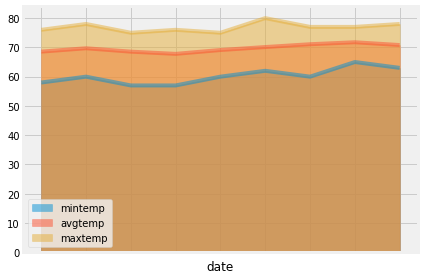

In [27]:
# Plot the daily normals as an area plot with `stacked=False`
daily_df3.plot.area(stacked=False)
plt.tight_layout()
plt.savefig("Images/dailynorms.png")
plt.show()